# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
data = np.loadtxt("tempmetingen.csv",delimiter = ";",skiprows = 1)

t = data[:,0]*60 #s
T = data[:,1]+273.15 #K

In [10]:
m_beker = 820.8e-3 #kg
m_beker_water_init = 1292.9e-3 #kg
m_beker_fin = 1274.9e-3 #kg


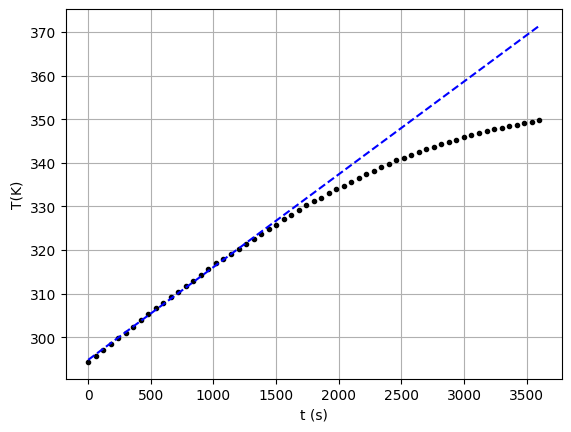

In [8]:
def fitfunc(x,a,b):
    return a*x + b

t_mod = t[t<1500]
T_mod = T[t<1500]
popt,pcov = curve_fit(fitfunc,t_mod,T_mod)

xfit = np.linspace(min(t),max(t),1000)
yfit = fitfunc(xfit,*popt)

#Plot data
plt.figure()

plt.plot(t,T,"k.")
plt.plot(xfit,yfit,"b--")

plt.xlabel("t (s)")
plt.ylabel("T(K)")

plt.grid()
plt.show()

In [23]:
#meetpunten
c = 4184
m = m_beker_fin - m_beker
delta_T = T[-1] - T[0]

Q = c * m * delta_T
# print(f"De hoeveelheid toegevoerde warmte Q is {Q:.3e} J")
#voor fit
dT = fitfunc(t[-1],popt[0],T[0])-T[0]

Q_fit = c*(m_beker_water_init - m_beker)*dT
# print(f"De hoeveelheid toegevoerde warmte Q is {Q_fit:.3e} J")
print(f"Q_fit - Q = {Q_fit - Q} J")

# #berekenen hoeveel energie nodig is om het massaverschil water te verdampen
# m_1 = m_beker_water_init - m_beker
# m_2 = m_beker_fin - m_beker
# m_damp = m_2-m_1

# Q_damp = c*m_damp*(373.15-T[0])
# print(f"De hoeveelheid nodige warmte Q is {Q_damp} J")

Q_fit - Q = 46005.38829303565 J


In [ ]:
H_v = 2.45e6 #J
q = H_v * m_damp
print(q)


-44100.00000000004


Deze waarde ligt dicht bij het verschil in toegevoerde warmte Q_fit - Q, dus de totale toegevoegde energie correspondeert inderdaad met de hoeveelheid verdampte water.

We zien dat de meetpunten niet lineair stijgen, omdat vanaf een bepaalde temperatuur het temperatuurverschil met de omgeving zo groot is dat het te snel afkoelt.

Om het experiment te verbeteren, moet er minder warmteverlies plaatsvinden. De warmteverlies kun je verminderen door een beter geïsoleerde maatbeker te nemen zodat er minder energie gaat naar het opwarmen van de maatbeker. 